# LILACS TCR Data Analysis:

## Matrix Plot for cell annotation

### Load in dependencies:

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import dandelion as ddl
import matplotlib.pyplot as plt
import matplotlib as mpl

sc.logging.print_header()
warnings.filterwarnings('ignore')
import scirpy as ir

/home/jo388/rds/hpc-work/conda_envs/new_bio/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


scanpy==1.10.3 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.1 pandas==2.2.3 scikit-learn==1.5.2 statsmodels==0.14.3 igraph==0.11.6 pynndescent==0.5.13


### Read in trascriptome file:

In [2]:
adata = sc.read_h5ad('data/aa_aligned_adata_sc.h5ad')


### Matrix Plot:

In [3]:
adata.obs['fine_clustering'].value_counts()

fine_clustering
CD4_Tcm       11783
CD8_Temra     11030
CD4_Tnaive     7620
CD8_Tem        6429
CD4_Treg       1804
CD8_Tnaive     1241
CD4_Tem        1135
CD4_Th2           8
Name: count, dtype: int64

In [4]:
T_Cell_Genes = {
                "Pan T":["CD4","CD8A","CD8B",],
                "Naïve / Memory":["SELL","CCR7","IL7R",'LEF1','TCF7',"CD27","S100A4","CD44",],
                "Tregs":["FOXP3","IL2RA","CTLA4","TIGIT",],
                "Th2":["CCR3","CCR8","CXCR4","GATA3"],
                "Cytotoxic":["GZMB","GZMH","NKG7",],
                
}

In [5]:
adata.obs.drop(columns=['CD4'], inplace=True)

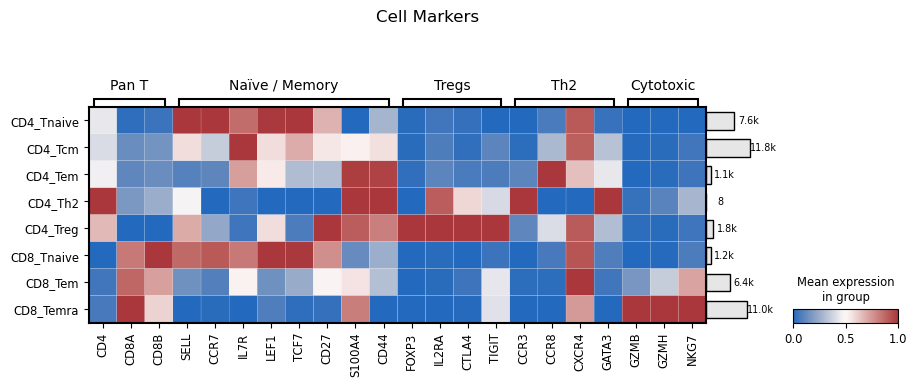

In [6]:
#Heatmap with 'var' scale
pl = sc.pl.matrixplot(adata, var_names=T_Cell_Genes, groupby=["fine_clustering"], cmap='vlag', 
                      standard_scale='var', var_group_rotation=0, dendrogram=False, return_fig=True, 
                      title="Cell Markers",)
pl.add_totals(color='#E6E6E6').style(edge_color='white', cmap='vlag').show()


In [7]:
bdata = adata.raw.to_adata()

In [8]:
sc.pp.scale(bdata, max_value=10)

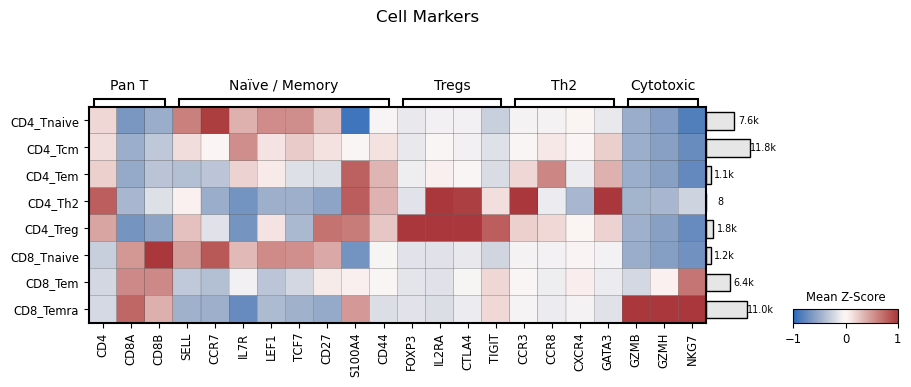

In [9]:
pl = sc.pl.matrixplot(bdata[bdata.obs['fine_clustering'].isin(['CD4_Tnaive','CD4_Tcm','CD4_Treg','CD4_Tem','CD4_Th2','CD8_Temra','CD8_Tem','CD8_Tnaive'])], var_names=T_Cell_Genes, groupby=["fine_clustering"], cmap='vlag', var_group_rotation=0, dendrogram=False, return_fig=True, title="Cell Markers",
                      vmin=-1, vmax=1, colorbar_title='Mean Z-Score')
pl.add_totals(color='#E6E6E6').style(edge_color='black', cmap='vlag').show()